##**Rock, Paper, and Scissors** 
# The proposed assignment is a multiclass image recognition task. You should create, compile, and train your CNN model using the "Rock, Paper, and Scissors" open dataset.
# Note: You need to return the .ipynb file after running your codes along with the results
#The accepted result: No variance and no bias - Training accuracy >= 98% 
#The maximum gap between the validation and training accuracies must be 3%.
# For getting more information, please watch the "CNN_assignment_guide" video.
# Moreover, you would need to study the related lesson if you have some misunderstanding here.
# The submission Deadline: 13.10.2021 at 12:45 pm.

In [3]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-10-11 12:30:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   108MB/s    in 1.8s    

2021-10-11 12:30:08 (108 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-10-11 12:30:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.0.48, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/t

In [4]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-002.png', 'rock02-070.png', 'rock04-061.png', 'rock05ck01-056.png', 'rock02-011.png', 'rock01-068.png', 'rock01-017.png', 'rock05ck01-001.png', 'rock05ck01-075.png', 'rock03-019.png']
['paper05-055.png', 'paper01-115.png', 'paper05-109.png', 'paper05-031.png', 'paper01-019.png', 'paper01-032.png', 'paper04-087.png', 'paper03-039.png', 'paper04-005.png', 'paper07-088.png']
['scissors03-012.png', 'scissors03-037.png', 'scissors01-039.png', 'scissors04-004.png', 'testscissors03-039.png', 'scissors03-045.png', 'testscissors03-112.png', 'scissors01-109.png', 'scissors01-051.png', 'testscissors01-019.png']


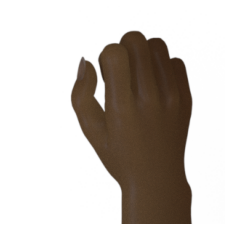

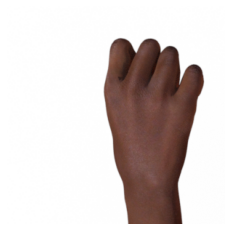

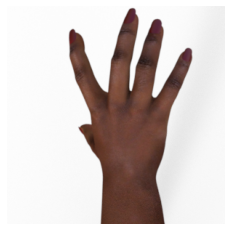

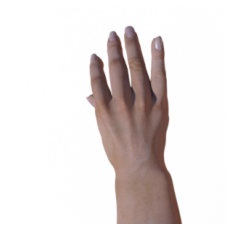

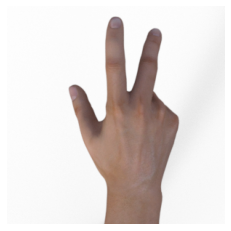

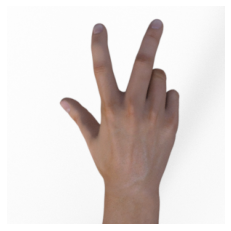

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [17]:
# YOUR CODE HERE
# START
# myCallback, acc > 0.98
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True
        else:
          print("Fucked up!")


# END

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

TRAINING_DIR = "/tmp/rps/"
# YOUR CODE HERE
# START
# Data Agumentation by ImageDataGenerator, you need rotation, flip horizental, shearing, focus, etc.
training_datagen = ImageDataGenerator(
    rescale=1/255, 
    rotation_range =40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode='nearest') 


# END
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # YOUR CODE HERE
    # BEGIN
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution, 64 neurons
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    
    # MaxPooling layer (2, 2)
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution, you can test different number of neurons
    # MaxPooling layer (2, 2)
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The third convolution, 128 neurons
    # MaxPooling layer (2, 2)
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The fourth convolution, you can test different number of neurons
    # MaxPooling layer (2, 2)
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # You can add more Conv and pooling layers here (Optional)
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neurons hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # An output layer for a multiclass problem
    tf.keras.layers.Dense(3, activation='softmax')
    # END
])


model.summary()

# YOUR CODE HERE
# BEGIN
# Compile Model, try different optimizers, metrics=['accuracy']
model.compile(loss='categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])
# Train the model, use myCallback for acc > 0.98, verbose=1

history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = validation_generator,
    verbose=1,
    callbacks = [my_callbacks()]
)

# ENDß

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 17, 17, 128)       0         
_____________________________________

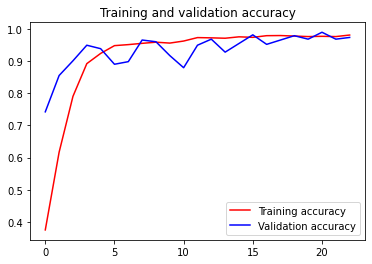

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving rock.png to rock.png
rock.png
[[1.0816987e-31 1.0000000e+00 0.0000000e+00]]
